In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
df = pd.read_csv("/home/isaacp/repos/EvMatsim/output/ITERS/it.10/10.countscompare.txt", sep="\t")

In [7]:
df.head()

,Link Id,Count Station Id,Hour,MATSIM volumes,Count volumes,Relative Error,Normalized Relative Error,GEH
0,1063,32,1,11,8,0.375,0.273,0.973
1,1063,32,2,17,17,0.000,0.000,0.000
2,1063,32,3,24,14,0.714,0.417,2.294
3,1063,32,4,10,26,-0.615,0.615,3.771
4,1063,32,5,18,6,2.000,0.667,3.464


In [8]:
optimized_hour_sum = df.groupby("Hour")["Count volumes"].sum()

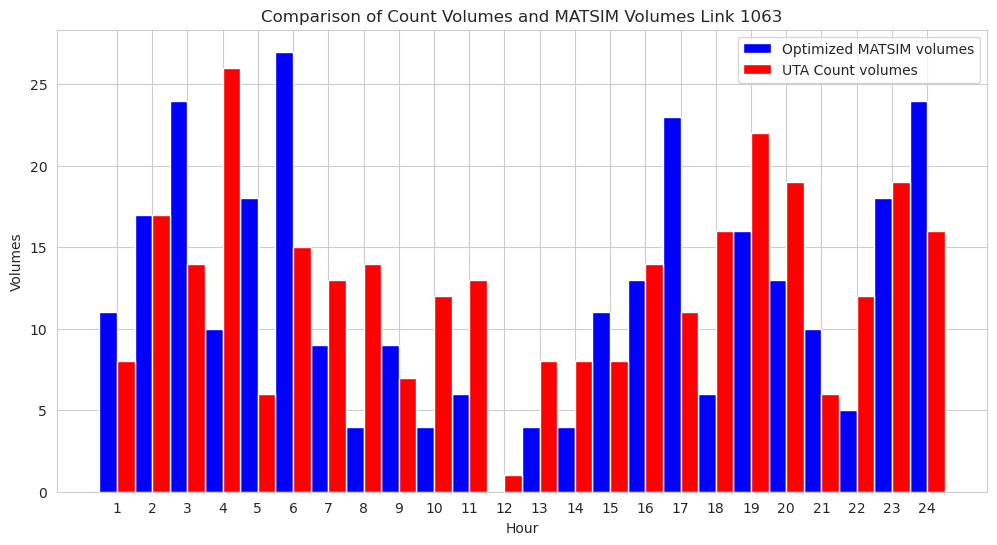

In [13]:
link = 1063
df_link = df[df["Link Id"] == link]

unique_hours = pd.unique(df_link["Hour"])
bar_width = 0.5  # Width of each bar

# X positions for each set of bars
r1 = np.arange(len(unique_hours))
r2 = [x + bar_width for x in r1]


plt.figure(figsize=(12, 6))

plt.bar(
    r1, df_link["MATSIM volumes"], color="blue", width=bar_width, label="Optimized MATSIM volumes"
)
plt.bar(
    r2, df_link["Count volumes"], color="red", width=bar_width, label="UTA Count volumes"
)

# Plot MATSIM volumes histogram

# Labels, title, and legend
plt.xlabel("Hour")
plt.ylabel("Volumes")
plt.title(f"Comparison of Count Volumes and MATSIM Volumes Link {link}")
plt.xticks([r + (bar_width / 2) for r in range(len(unique_hours))], unique_hours)
plt.legend()

plt.show()

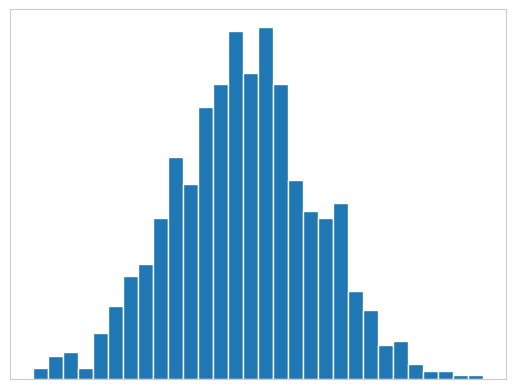

In [10]:
sns.set_style("whitegrid")
x = np.random.normal(10, 3, size=1000)
x.clip(0, np.inf, out=x)
plt.xticks([])
plt.yticks([])
plt.hist(x, bins=30)
plt.show()